Some practise using Seaborn for data visualisation. Notebook is inspired by the work in R: https://www.kaggle.com/umeshnarayanappa/explore-video-games-sales.

In [642]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
sns.despine()

Setting a single year entry to 2009 that was mistakenly set to year 2020, also converting years in float to years as integer.

In [643]:
df = pd.read_csv('vgsales.csv')
year_data = df['Year']
year_data = year_data.dropna()
year_data = year_data.astype(int)
df = df.drop('Year', axis=1)
df['Year'] = year_data
df['Year'] = df['Year'].replace(2020, 2009)

In [644]:
df.head(1)

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year
0,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006.0


In [645]:
print("Number of games: ", len(df))
publishers = df['Publisher'].unique()
print("Number of publishers: ", len(publishers))
platforms = df['Platform'].unique()
print("Number of platforms: ", len(platforms))
genres = df['Genre'].unique()
print("Number of genres: ", len(genres))

Number of games:  16598
Number of publishers:  579
Number of platforms:  31
Number of genres:  12


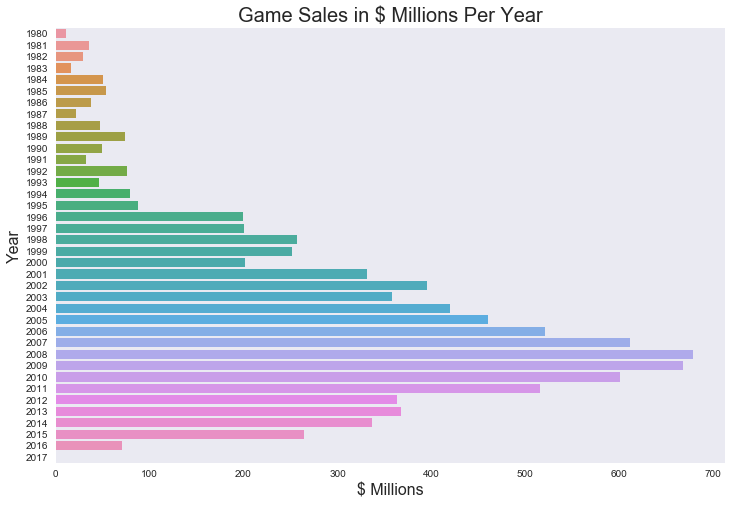

In [671]:
salesYear = df.groupby(['Year']).sum()
salesYear = salesYear.dropna()
ind = salesYear.index
ind = ind.astype(int)
plt.figure(figsize=(12,8))
ax = sns.barplot(y = ind, x = salesYear['Global_Sales'], orient='h')
ax.set_xlabel(xlabel='$ Millions', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)
plt.show();

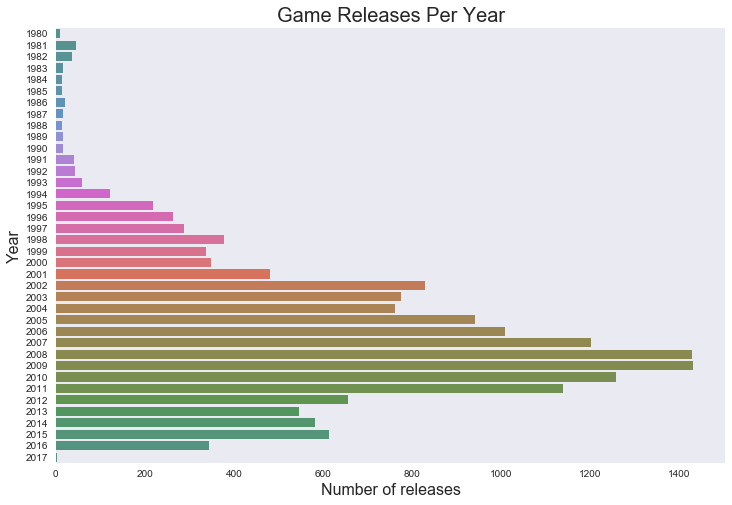

In [686]:
numRel = df.groupby(['Year']).count()
numRel = numRel.dropna()
ind = numRel.index
ind = ind.astype(int)
plt.figure(figsize=(12,8))
colors = sns.husl_palette(38, h=.5, l=.6, s=.75)
ax = sns.barplot(y = ind, x = numRel['Rank'], orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of releases', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Releases Per Year', fontsize=20)
plt.show();

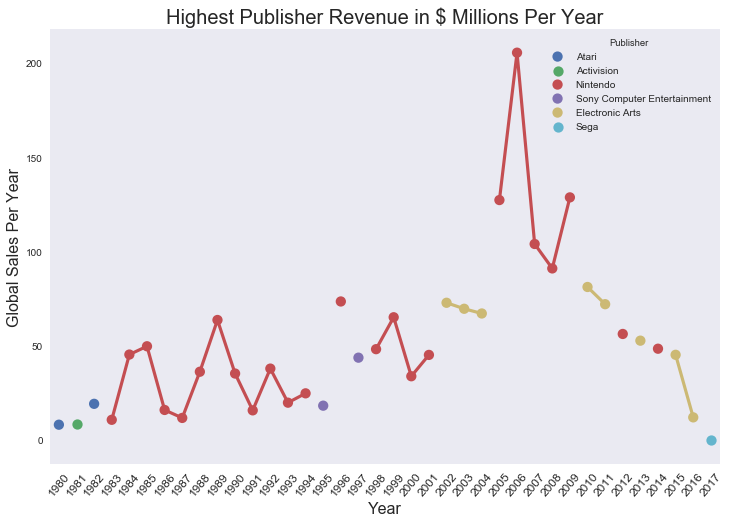

In [648]:
pubSales = df.pivot_table('Global_Sales', index='Publisher', columns='Year', aggfunc='sum')
pubSales = pubSales.fillna(0)
pub = pubSales.idxmax()
Sales = pubSales.max()
lizt = [pub, Sales]
pubSales = pd.concat(lizt, axis=1)
pubSales.columns = ['Publisher', 'Global Sales']
ind = pubSales.index.astype(int)
pubSales.index = ind
plt.figure(figsize=(12,8))
ax = sns.pointplot(y = 'Global Sales', x = list(ind), hue='Publisher', data=pubSales, size=15)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Global Sales Per Year', fontsize=16)
ax.set_title(label='Highest Publisher Revenue in $ Millions Per Year', fontsize=20)
ax.set_xticklabels(labels = ind, fontsize=12, rotation=50)
plt.show();

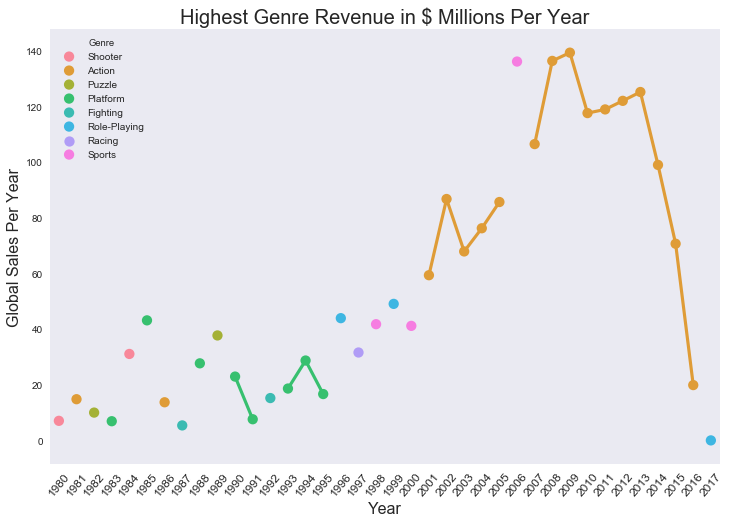

In [649]:
# Top Genre by revenue each year.
genSales = df.pivot_table('Global_Sales', index='Genre', columns='Year', aggfunc='sum')
genSales = genSales.fillna(0)
gen = genSales.idxmax()
Sales = genSales.max()
lizt = [gen, Sales]
genSales = pd.concat(lizt, axis=1)
genSales.columns = ['Genre', 'Global Sales']
ind = genSales.index.astype(int)
genSales.index = ind
plt.figure(figsize=(12,8))
ax = sns.pointplot(y = 'Global Sales', x = list(ind), hue='Genre', data=genSales, size=15)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Global Sales Per Year', fontsize=16)
ax.set_title(label='Highest Genre Revenue in $ Millions Per Year', fontsize=20)
ax.set_xticklabels(labels = ind, fontsize=12, rotation=50)
plt.show();

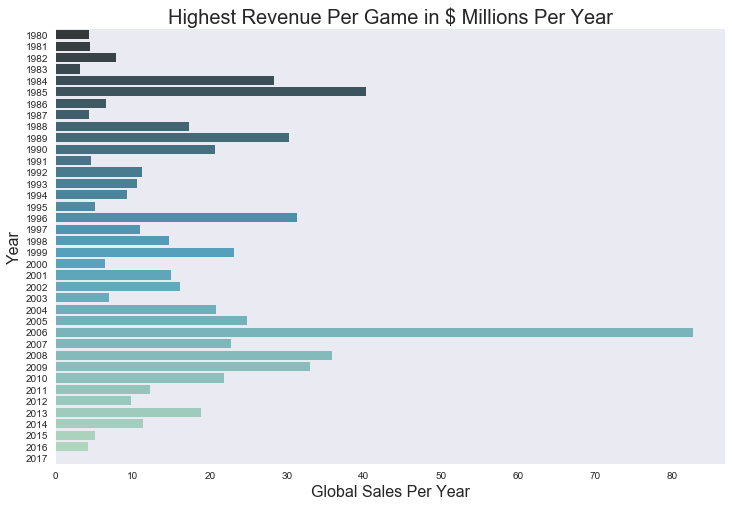

,Game,Global Sales
Year,,
1980,Asteroids,4.310
1981,Pitfall!,4.500
1982,Pac-Man,7.810
1983,Baseball,3.200
1984,Duck Hunt,28.310
1985,Super Mario Bros.,40.240
1986,The Legend of Zelda,6.510
1987,Zelda II: The Adventure of Link,4.380
1988,Super Mario Bros. 3,17.280


In [689]:
gameSales = df.pivot_table('Global_Sales', index='Name', columns='Year')
gameSales = gameSales.fillna(0)
game = gameSales.idxmax()
Sales = gameSales.max()
lizt = [game, Sales]
gameSales = pd.concat(lizt, axis=1)
gameSales.columns = ['Game', 'Global Sales']
ind = gameSales.index.astype(int)
gameSales.index = ind
plt.figure(figsize=(12,8))
colors = sns.color_palette("GnBu_d", len(gameSales))
ax = sns.barplot(y = ind , x = 'Global Sales', data=gameSales, orient='h', palette=colors)
ax.set_xlabel(xlabel='Global Sales Per Year', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Highest Revenue Per Game in $ Millions Per Year', fontsize=20)
plt.show();
gameSales

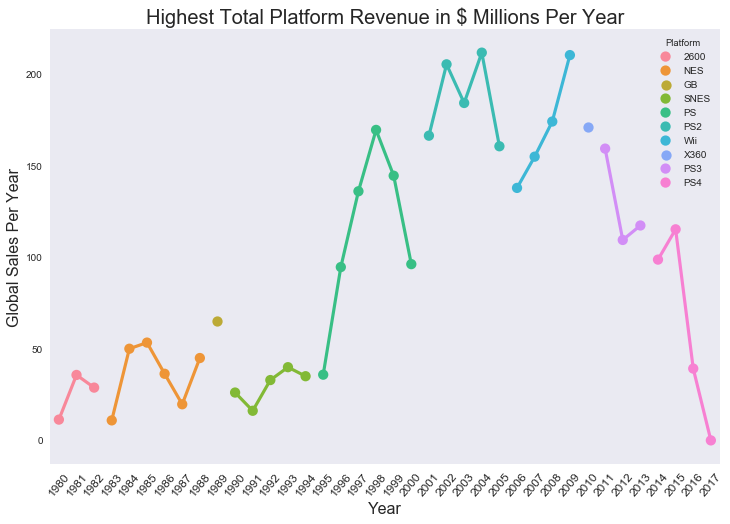

In [651]:
platSales = df.pivot_table('Global_Sales', index='Platform', columns='Year', aggfunc='sum')
platSales = platSales.fillna(0)
plat = platSales.idxmax()
Sales = platSales.max()
lizt = [plat, Sales]
platSales = pd.concat(lizt, axis=1)
platSales.columns = ['Platform', 'Global Sales']
ind = platSales.index.astype(int)
platSales.index = ind
plt.figure(figsize=(12,8))
ax = sns.pointplot(y = 'Global Sales', x = list(ind), hue='Platform', data=platSales, size=15)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Global Sales Per Year', fontsize=16)
ax.set_title(label='Highest Total Platform Revenue in $ Millions Per Year', fontsize=20)
ax.set_xticklabels(labels = ind, fontsize=12, rotation=50)
plt.show();

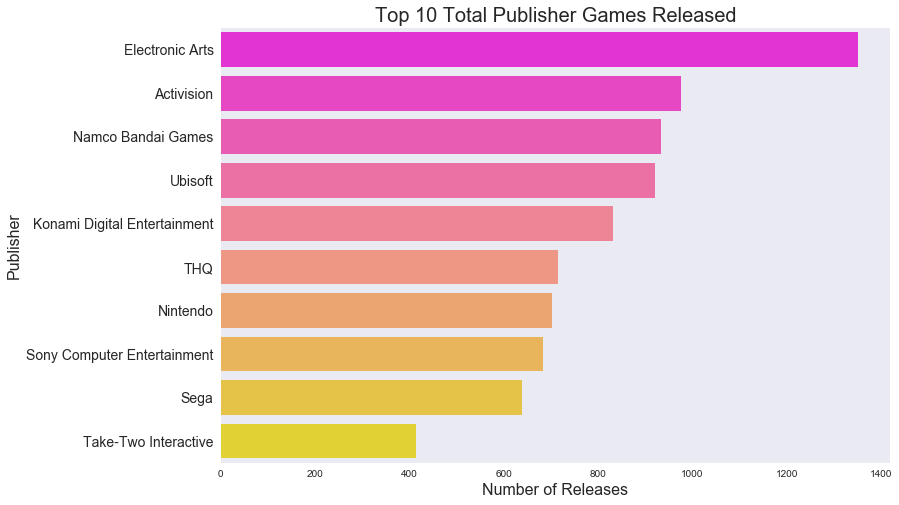

In [652]:
pubRel = df.groupby(['Publisher']).count()
pubRel = pubRel['Rank']
pubRel = pubRel.sort_values(ascending=False)
pubRel = pd.DataFrame(pubRel[0:10])
pubRel.columns = ['Releases']
colors = sns.color_palette("spring", len(pubRel))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = pubRel.index , x = 'Releases', data=pubRel, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Total Publisher Games Released', fontsize=20)
ax.set_yticklabels(labels = pubRel.index, fontsize=14)
plt.show();

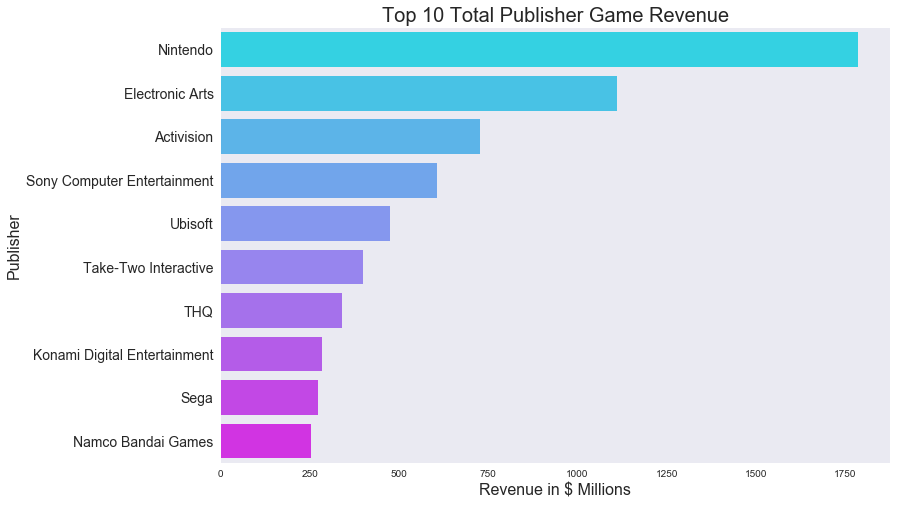

In [653]:
# Top 10 publishers by total revenue
pubRev = df.groupby(['Publisher']).sum()
pubRev = pubRev['Global_Sales']
pubRev = pubRev.sort_values(ascending=False)
pubRev = pd.DataFrame(pubRev[0:10])
pubRev.columns = ['Global Sales']
colors = sns.color_palette("cool", len(pubRev))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = pubRev.index , x = 'Global Sales', data=pubRev, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Total Publisher Game Revenue', fontsize=20)
ax.set_yticklabels(labels = pubRev.index, fontsize=14)
plt.show();

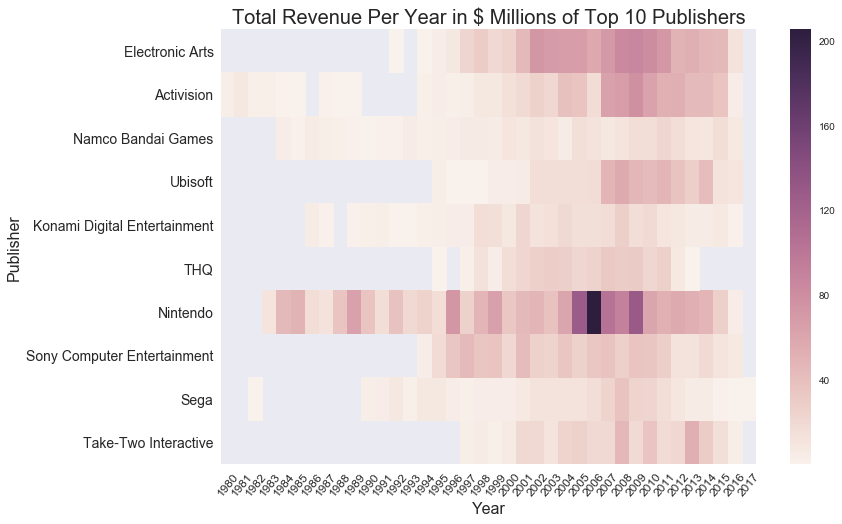

In [654]:
lizt = ['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment', 'THQ', 'Nintendo', 'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive']
data = df.pivot_table('Global_Sales', columns='Publisher', index='Year', aggfunc='sum')
data = [[data[i] for i in lizt]]
data = np.array(data)
data = np.reshape(data, (10, 38))
data = pd.DataFrame(data)
data.index = lizt
data.columns = ind
liztr = lizt[::-1]
plt.figure(figsize=(12,8))
ax = sns.heatmap(data)
ax.set_xticklabels(labels = ind, fontsize=12, rotation=50)
ax.set_yticklabels(labels = liztr, fontsize=14, rotation=0)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Total Revenue Per Year in $ Millions of Top 10 Publishers', fontsize=20)
plt.show();

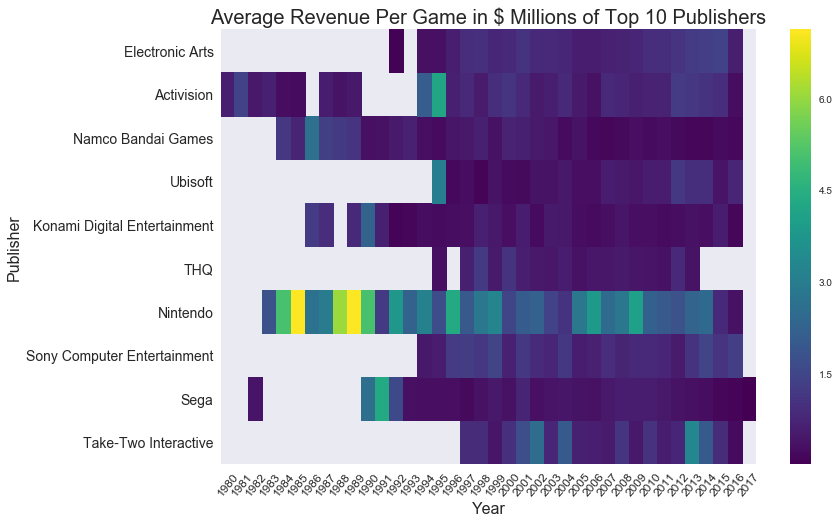

In [655]:
lizt = ['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment', 'THQ', 'Nintendo', 'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive']
data = df.pivot_table('Global_Sales', columns='Publisher', index='Year', aggfunc='mean')
data = [[data[i] for i in lizt]]
data = np.array(data)
data = np.reshape(data, (10, 38))
data = pd.DataFrame(data)
data.index = lizt
data.columns = ind
liztr = lizt[::-1]
plt.figure(figsize=(12,8))
ax = sns.heatmap(data, cmap='viridis')
ax.set_xticklabels(labels = ind, fontsize=12, rotation=50)
ax.set_yticklabels(labels = liztr, fontsize=14, rotation=0)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Average Revenue Per Game in $ Millions of Top 10 Publishers', fontsize=20)
plt.show();

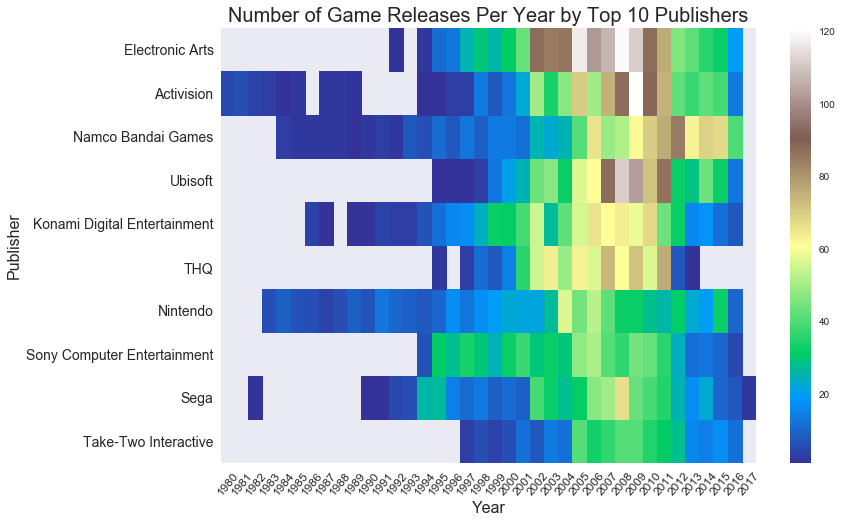

In [656]:
lizt = ['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment', 'THQ', 'Nintendo', 'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive']
data = df.pivot_table('Global_Sales', columns='Publisher', index='Year', aggfunc='count')
data = [[data[i] for i in lizt]]
data = np.array(data)
data = np.reshape(data, (10, 38))
data = pd.DataFrame(data)
data.index = lizt
data.columns = ind
liztr = lizt[::-1]
plt.figure(figsize=(12,8))
ax = sns.heatmap(data, cmap='terrain')
ax.set_xticklabels(labels = ind, fontsize=12, rotation=50)
ax.set_yticklabels(labels = liztr, fontsize=14, rotation=0)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Number of Game Releases Per Year by Top 10 Publishers', fontsize=20)
plt.show();

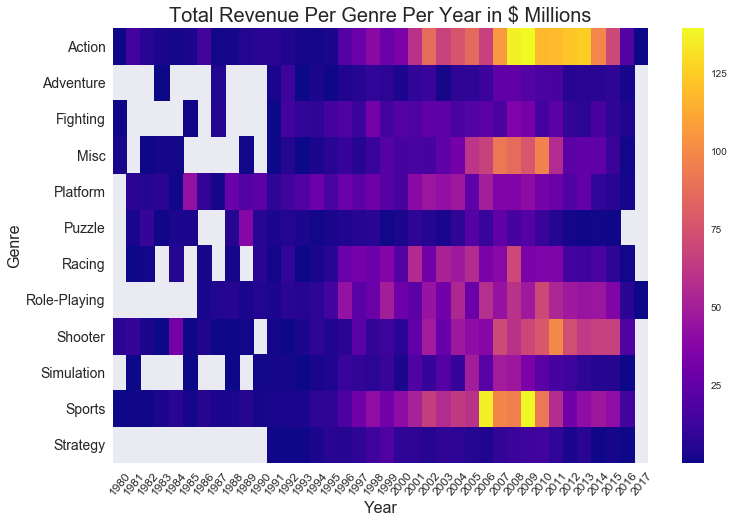

In [657]:
# Top 3 Genres by Revenue Per Region
lizt = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
data = df.pivot_table('Global_Sales', columns='Genre', index='Year', aggfunc='sum')
data = [[data[i] for i in lizt]]
data = np.array(data)
data = np.reshape(data, (12, 38))
data = pd.DataFrame(data)
data.index = lizt
data.columns = ind
liztr = lizt[::-1]
plt.figure(figsize=(12,8))
ax = sns.heatmap(data, cmap='plasma')
ax.set_xticklabels(labels = ind, fontsize=12, rotation=50)
ax.set_yticklabels(labels = liztr, fontsize=14, rotation=0)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Total Revenue Per Genre Per Year in $ Millions', fontsize=20)
plt.show();

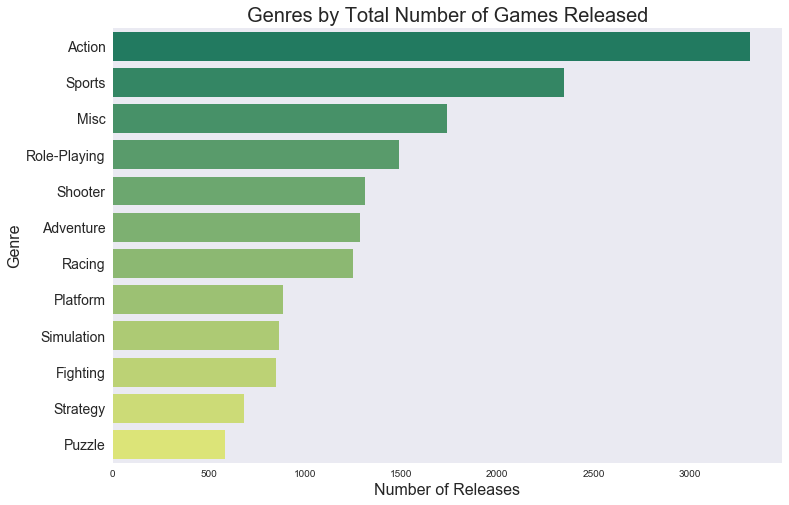

In [658]:
genRel = df.groupby(['Genre']).count()
genRel = genRel['Rank']
genRel = genRel.sort_values(ascending=False)
genRel = pd.DataFrame(genRel)
genRel.columns = ['Releases']
colors = sns.color_palette("summer", len(genRel))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genRel.index , x = 'Releases', data=genRel, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Genres by Total Number of Games Released', fontsize=20)
ax.set_yticklabels(labels = genRel.index, fontsize=14)
plt.show();

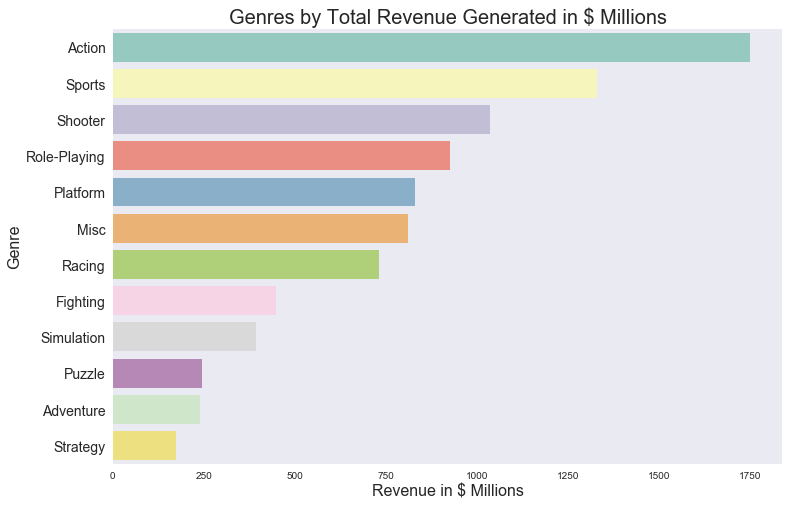

In [659]:
genRev = df.groupby(['Genre']).sum()
genRev = genRev['Global_Sales']
genRev = genRev.sort_values(ascending=False)
genRev = pd.DataFrame(genRev)
genRev.columns = ['Revenue']
colors = sns.color_palette('Set3', len(genRev))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genRev.index , x = 'Revenue', data=genRev, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Genres by Total Revenue Generated in $ Millions', fontsize=20)
ax.set_yticklabels(labels = genRev.index, fontsize=14)
plt.show();

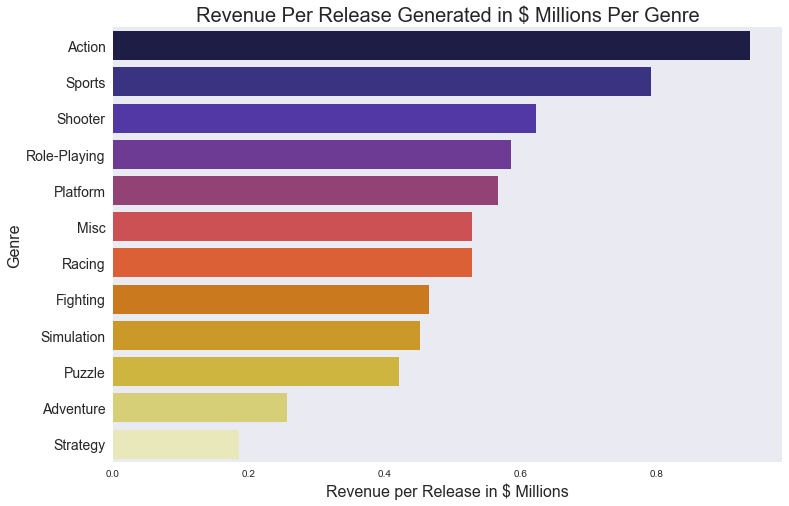

In [660]:
# Genre by revenue per release
lizt = [genRev, genRel]
genRevRel = pd.concat(lizt, axis=1)
genRevRel = pd.DataFrame(genRevRel['Revenue'] / genRevRel['Releases'])
genRevRel.columns = ['Revenue Per Release']
genRevRel = genRevRel.sort_values(by='Revenue Per Release',ascending=False)
colors = sns.color_palette("CMRmap", len(genRevRel))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genRevRel.index , x = 'Revenue Per Release', data=genRevRel, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue per Release in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Revenue Per Release Generated in $ Millions Per Genre', fontsize=20)
ax.set_yticklabels(labels = genRev.index, fontsize=14)
plt.show();

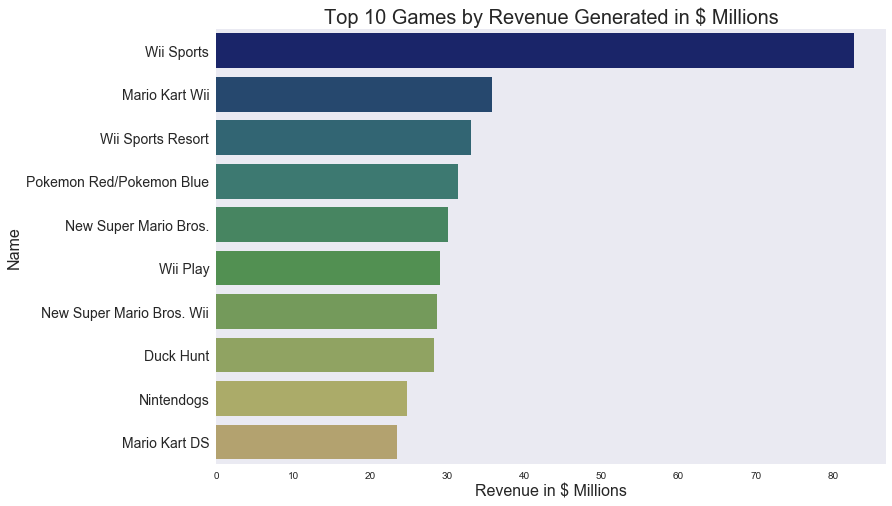

In [661]:
# Top 10 Games by revenue
gameRev = df.pivot_table('Global_Sales', columns='Name')
gameRev = pd.DataFrame(gameRev)
gameRev.columns = ['Name']
gameRev = gameRev.sort_values(by='Name', ascending=False)
gameRev = gameRev[0:10]
plt.figure(figsize=(12,8))
colors = sns.color_palette("gist_earth", len(genRevRel))
ax = sns.barplot(y = gameRev.index , x = 'Name', data=gameRev, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Name', fontsize=16)
ax.set_title(label='Top 10 Games by Revenue Generated in $ Millions', fontsize=20)
ax.set_yticklabels(labels = gameRev.index, fontsize=14)
plt.show();

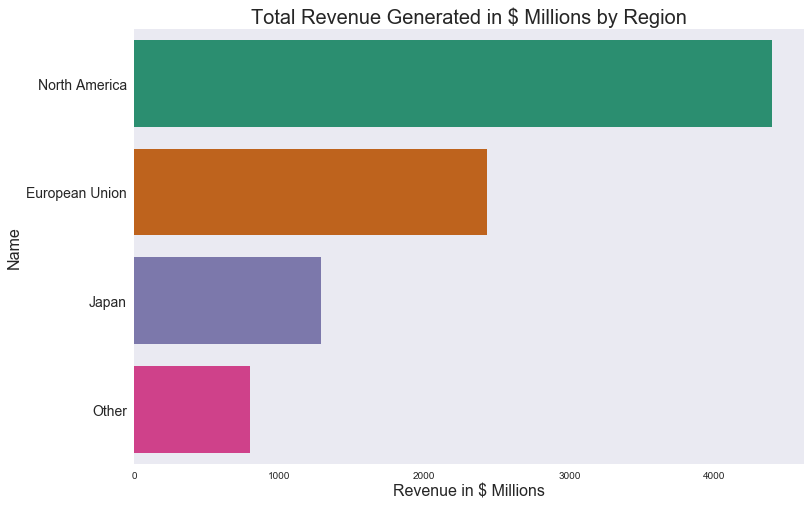

In [662]:
EU = df['EU_Sales'].sum()
JP = df['JP_Sales'].sum()
NA = df['NA_Sales'].sum()
Other = df['Other_Sales'].sum()
regRev = [EU, JP, NA, Other]
regRev = pd.DataFrame(regRev)
regRev.index = ['European Union', 'Japan', 'North America', 'Other']
regRev.columns = ['Revenue']
regRev = regRev.sort_values(by='Revenue', ascending=False)
plt.figure(figsize=(12,8))
colors = sns.color_palette("Dark2", len(regRev))
ax = sns.barplot(y = regRev.index , x = 'Revenue', data=regRev, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Name', fontsize=16)
ax.set_title(label='Total Revenue Generated in $ Millions by Region', fontsize=20)
ax.set_yticklabels(labels = regRev.index, fontsize=14)
plt.show();

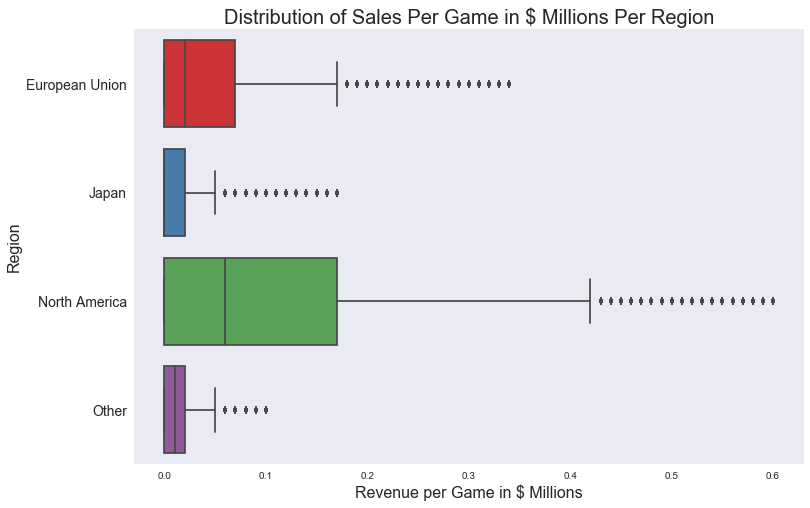

In [663]:
EU = df['EU_Sales']
JP = df['JP_Sales']
NA = df['NA_Sales']
Other = df['Other_Sales']
regRevDist = [EU, JP, NA, Other]
regRevDist = pd.concat(regRevDist, axis=1)
regRevDist.columns = ['European Union', 'Japan', 'North America', 'Other']
q = regRevDist.quantile(0.90)
regRevDist = regRevDist[regRevDist < q]
plt.figure(figsize=(12,8))
colors = sns.color_palette("Set1", len(regRevDist))
ax = sns.boxplot(data=regRevDist, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue per Game in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Region', fontsize=16)
ax.set_title(label='Distribution of Sales Per Game in $ Millions Per Region', fontsize=20)
ax.set_yticklabels(labels=regRevDist.columns, fontsize=14)
plt.show()

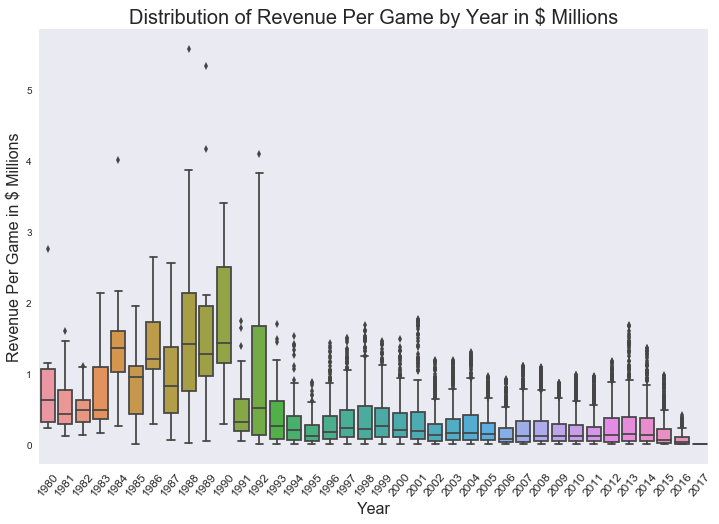

In [664]:
x1980 = df[df['Year'] == 1980.0]['Global_Sales']
x1981 = df[df['Year'] == 1981.0]['Global_Sales']
x1982 = df[df['Year'] == 1982.0]['Global_Sales']
x1983 = df[df['Year'] == 1983.0]['Global_Sales']
x1984 = df[df['Year'] == 1984.0]['Global_Sales']
x1985 = df[df['Year'] == 1985.0]['Global_Sales']
x1986 = df[df['Year'] == 1986.0]['Global_Sales']
x1987 = df[df['Year'] == 1987.0]['Global_Sales']
x1988 = df[df['Year'] == 1988.0]['Global_Sales']
x1989 = df[df['Year'] == 1989.0]['Global_Sales']
x1990 = df[df['Year'] == 1990.0]['Global_Sales']
x1991 = df[df['Year'] == 1991.0]['Global_Sales']
x1992 = df[df['Year'] == 1992.0]['Global_Sales']
x1993 = df[df['Year'] == 1993.0]['Global_Sales']
x1994 = df[df['Year'] == 1994.0]['Global_Sales']
x1995 = df[df['Year'] == 1995.0]['Global_Sales']
x1996 = df[df['Year'] == 1996.0]['Global_Sales']
x1997 = df[df['Year'] == 1997.0]['Global_Sales']
x1998 = df[df['Year'] == 1998.0]['Global_Sales']
x1999 = df[df['Year'] == 1999.0]['Global_Sales']
x2000 = df[df['Year'] == 2000.0]['Global_Sales']
x2001 = df[df['Year'] == 2001.0]['Global_Sales']
x2002 = df[df['Year'] == 2002.0]['Global_Sales']
x2003 = df[df['Year'] == 2003.0]['Global_Sales']
x2004 = df[df['Year'] == 2004.0]['Global_Sales']
x2005 = df[df['Year'] == 2005.0]['Global_Sales']
x2006 = df[df['Year'] == 2006.0]['Global_Sales']
x2007 = df[df['Year'] == 2007.0]['Global_Sales']
x2008 = df[df['Year'] == 2008.0]['Global_Sales']
x2009 = df[df['Year'] == 2009.0]['Global_Sales']
x2010 = df[df['Year'] == 2010.0]['Global_Sales']
x2011 = df[df['Year'] == 2011.0]['Global_Sales']
x2012 = df[df['Year'] == 2012.0]['Global_Sales']
x2013 = df[df['Year'] == 2013.0]['Global_Sales']
x2014 = df[df['Year'] == 2014.0]['Global_Sales']
x2015 = df[df['Year'] == 2015.0]['Global_Sales']
x2016 = df[df['Year'] == 2016.0]['Global_Sales']
x2017 = df[df['Year'] == 2017.0]['Global_Sales']

years = [x1980,x1981,x1982,x1983,x1984,x1985,x1986,x1987,x1988,x1989,x1990,x1991,x1992,x1993,x1994,x1995,x1996,x1997,x1998,x1999,x2000,x2001,x2002,x2003,x2004,x2005,x2006,x2007,x2008,x2009,x2010,x2011,x2012,x2013,x2014,x2015,x2016,x2017]
years = pd.concat(years, axis=1)
years.columns = ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
                '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
                '1996', '1997', '1998', '1999', '2000', '2001', '2002',
                '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
                '2011', '2012', '2013', '2014', '2015', '2016', '2017']
q = years.quantile(0.90)
years = years[years < q]
plt.figure(figsize=(12,8))
ax = sns.boxplot(data=years)
ax.set_xticklabels(labels=years.columns, fontsize=12, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Revenue Per Game in $ Millions', fontsize=16)
ax.set_title(label='Distribution of Revenue Per Game by Year in $ Millions', fontsize=20)
plt.show()
plt.show()

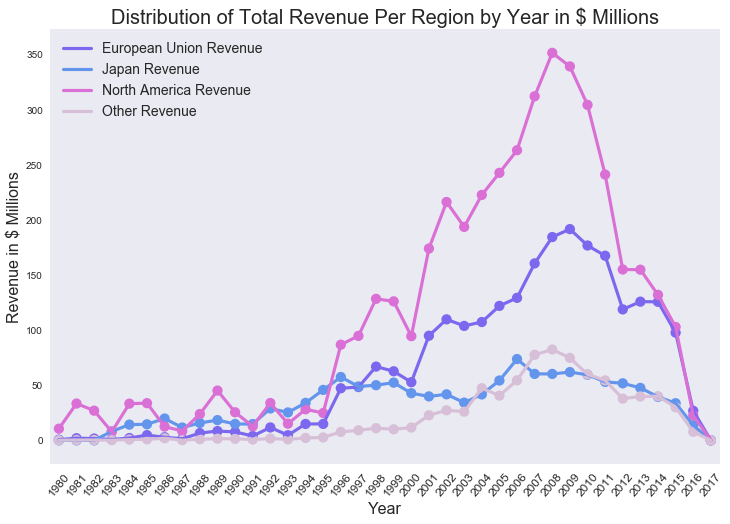

In [665]:
x1980 = df[df['Year'] == 1980.0].sum()
x1981 = df[df['Year'] == 1981.0].sum()
x1982 = df[df['Year'] == 1982.0].sum()
x1983 = df[df['Year'] == 1983.0].sum()
x1984 = df[df['Year'] == 1984.0].sum()
x1985 = df[df['Year'] == 1985.0].sum()
x1986 = df[df['Year'] == 1986.0].sum()
x1987 = df[df['Year'] == 1987.0].sum()
x1988 = df[df['Year'] == 1988.0].sum()
x1989 = df[df['Year'] == 1989.0].sum()
x1990 = df[df['Year'] == 1990.0].sum()
x1991 = df[df['Year'] == 1991.0].sum()
x1992 = df[df['Year'] == 1992.0].sum()
x1993 = df[df['Year'] == 1993.0].sum()
x1994 = df[df['Year'] == 1994.0].sum()
x1995 = df[df['Year'] == 1995.0].sum()
x1996 = df[df['Year'] == 1996.0].sum()
x1997 = df[df['Year'] == 1997.0].sum()
x1998 = df[df['Year'] == 1998.0].sum()
x1999 = df[df['Year'] == 1999.0].sum()
x2000 = df[df['Year'] == 2000.0].sum()
x2001 = df[df['Year'] == 2001.0].sum()
x2002 = df[df['Year'] == 2002.0].sum()
x2003 = df[df['Year'] == 2003.0].sum()
x2004 = df[df['Year'] == 2004.0].sum()
x2005 = df[df['Year'] == 2005.0].sum()
x2006 = df[df['Year'] == 2006.0].sum()
x2007 = df[df['Year'] == 2007.0].sum()
x2008 = df[df['Year'] == 2008.0].sum()
x2009 = df[df['Year'] == 2009.0].sum()
x2010 = df[df['Year'] == 2010.0].sum()
x2011 = df[df['Year'] == 2011.0].sum()
x2012 = df[df['Year'] == 2012.0].sum()
x2013 = df[df['Year'] == 2013.0].sum()
x2014 = df[df['Year'] == 2014.0].sum()
x2015 = df[df['Year'] == 2015.0].sum()
x2016 = df[df['Year'] == 2016.0].sum()
x2017 = df[df['Year'] == 2017.0].sum()

years = [x1980,x1981,x1982,x1983,x1984,x1985,x1986,x1987,x1988,x1989,x1990,x1991,x1992,x1993,x1994,x1995,x1996,x1997,x1998,x1999,x2000,x2001,x2002,x2003,x2004,x2005,x2006,x2007,x2008,x2009,x2010,x2011,x2012,x2013,x2014,x2015,x2016,x2017]
years = pd.concat(years, axis=1)
years.columns = ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
                '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
                '1996', '1997', '1998', '1999', '2000', '2001', '2002',
                '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
                '2011', '2012', '2013', '2014', '2015', '2016', '2017']
years = years.T
plt.figure(figsize=(12,8))
ax = sns.pointplot(x=years.index, y=years['EU_Sales'], color='mediumslateblue')
ax = sns.pointplot(x=years.index, y=years['JP_Sales'], color='cornflowerblue')
ax = sns.pointplot(x=years.index, y=years['NA_Sales'], color='orchid')
ax = sns.pointplot(x=years.index, y=years['Other_Sales'], color='thistle')
ax.set_xticklabels(labels=years.index, fontsize=12, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Revenue in $ Millions', fontsize=16)
ax.set_title(label='Distribution of Total Revenue Per Region by Year in $ Millions', fontsize=20)
ax.legend(handles=ax.lines[::len(years)+1], labels=['European Union Revenue','Japan Revenue','North America Revenue','Other Revenue'], fontsize=14)
plt.show();

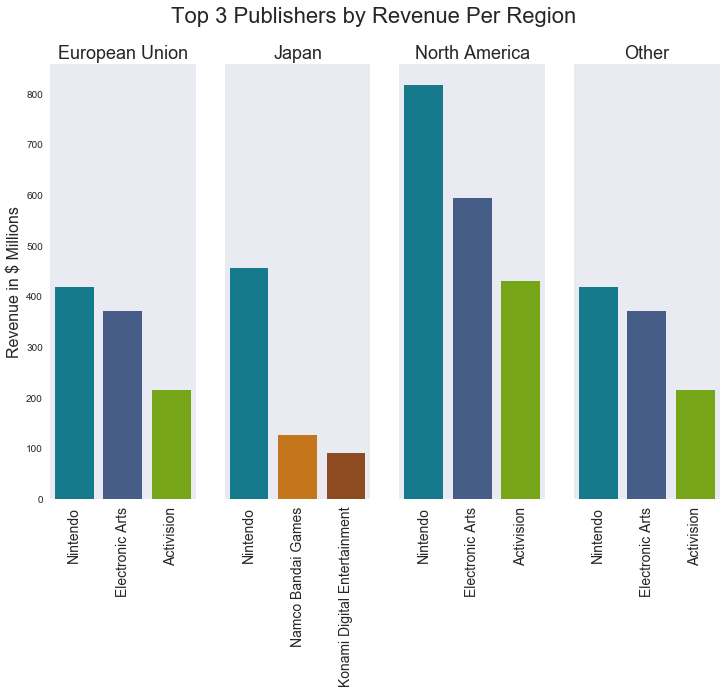

In [690]:
EU = df.pivot_table('EU_Sales', columns='Publisher', aggfunc='sum')
EU = EU.sort_values(ascending=False)
EU = EU.iloc[0:3]
JP = df.pivot_table('JP_Sales', columns='Publisher', aggfunc='sum')
JP = JP.sort_values(ascending=False)
JP = JP.iloc[0:3]
NA = df.pivot_table('NA_Sales', columns='Publisher', aggfunc='sum')
NA = NA.sort_values(ascending=False)
NA = NA.iloc[0:3]
Other = df.pivot_table('EU_Sales', columns='Publisher', aggfunc='sum')
Other = Other.sort_values(ascending=False)
Other = Other.iloc[0:3]

colors =  {'Nintendo':sns.xkcd_rgb["teal blue"], 'Electronic Arts':sns.xkcd_rgb["denim blue"], 'Activision':sns.xkcd_rgb["dark lime green"], 'Namco Bandai Games':sns.xkcd_rgb["pumpkin"], 'Konami Digital Entertainment':sns.xkcd_rgb["burnt umber"]}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU.index, rotation=90, size=14)
x_axis = ax1.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
sns.barplot(x=EU.index, y=EU, palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2, sharey=ax1)
ax2.set_xticklabels(labels = JP.index, rotation=90, size=14)
x_axis = ax2.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
y_axis = ax2.axes.get_yaxis()
y_axis.set_visible(False)
sns.barplot(x=JP.index, y=JP, palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = NA.index, rotation=90, size=14)
x_axis = ax3.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
y_axis = ax3.axes.get_yaxis()
y_axis.set_visible(False)
sns.barplot(x=NA.index, y=NA, palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other.index, rotation=90, size=14)
x_axis = ax4.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
y_axis = ax4.axes.get_yaxis()
y_axis.set_visible(False)
sns.barplot(x=Other.index, y=Other, palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Publishers by Revenue Per Region', size=22)
plt.show();

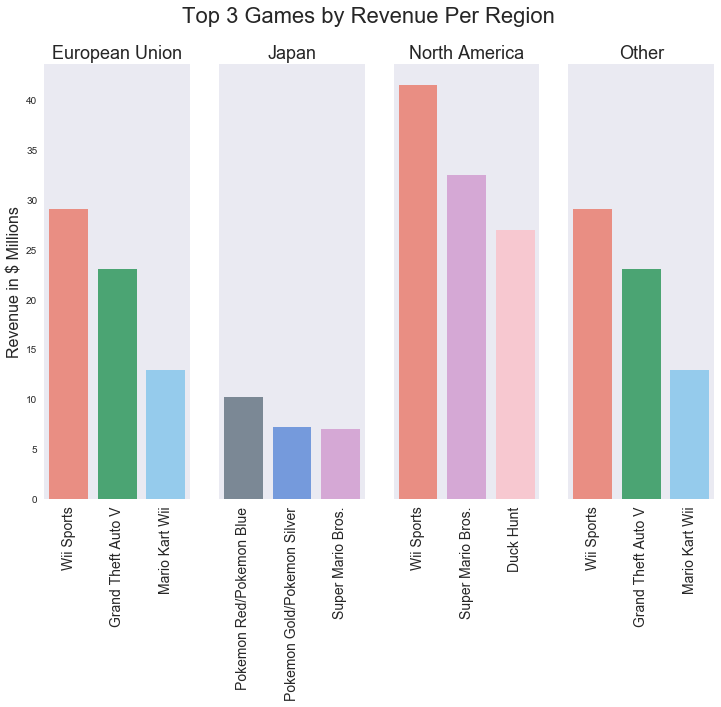

In [691]:
EU = df.pivot_table('EU_Sales', columns='Name', aggfunc='sum')
EU = EU.sort_values(ascending=False)
EU = EU.iloc[0:3]
JP = df.pivot_table('JP_Sales', columns='Name', aggfunc='sum')
JP = JP.sort_values(ascending=False)
JP = JP.iloc[0:3]
NA = df.pivot_table('NA_Sales', columns='Name', aggfunc='sum')
NA = NA.sort_values(ascending=False)
NA = NA.iloc[0:3]
Other = df.pivot_table('EU_Sales', columns='Name', aggfunc='sum')
Other = Other.sort_values(ascending=False)
Other = Other.iloc[0:3]

colors =  {'Wii Sports':"salmon", 'Grand Theft Auto V':"mediumseagreen", 'Mario Kart Wii':"lightskyblue", 'Pokemon Red/Pokemon Blue':"lightslategray", 'Pokemon Gold/Pokemon Silver':"cornflowerblue", 'Super Mario Bros.':"plum", 'Duck Hunt':"pink"}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU.index, rotation=90, size=14)
x_axis = ax1.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
sns.barplot(x=EU.index, y=EU, palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2, sharey=ax1)
ax2.set_xticklabels(labels = JP.index, rotation=90, size=14)
x_axis = ax2.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
y_axis = ax2.axes.get_yaxis()
y_axis.set_visible(False)
sns.barplot(x=JP.index, y=JP, palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = NA.index, rotation=90, size=14)
x_axis = ax3.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
y_axis = ax3.axes.get_yaxis()
y_axis.set_visible(False)
sns.barplot(x=NA.index, y=NA, palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other.index, rotation=90, size=14)
x_axis = ax4.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
y_axis = ax4.axes.get_yaxis()
y_axis.set_visible(False)
sns.barplot(x=Other.index, y=Other, palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Games by Revenue Per Region', size=22)
plt.show();

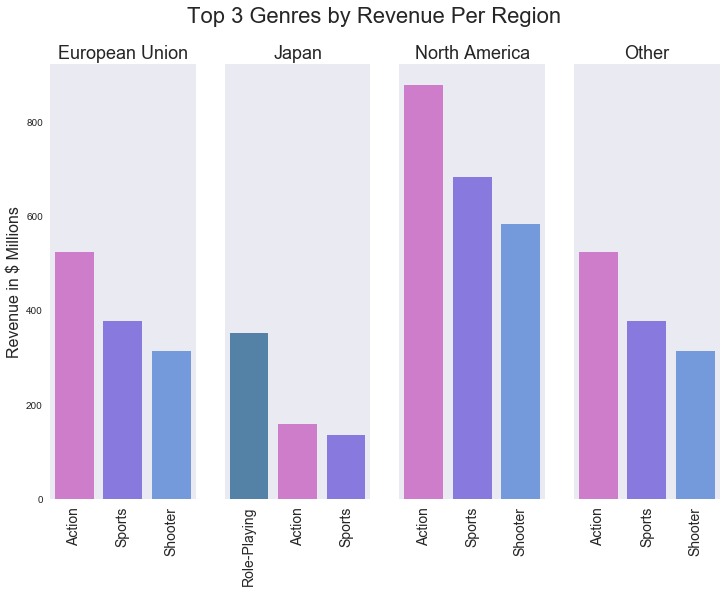

In [668]:
# Top 3 Genres by Revenue Per Region
EU = df.pivot_table('EU_Sales', columns='Genre', aggfunc='sum')
EU = EU.sort_values(ascending=False)
EU = EU.iloc[0:3]
JP = df.pivot_table('JP_Sales', columns='Genre', aggfunc='sum')
JP = JP.sort_values(ascending=False)
JP = JP.iloc[0:3]
NA = df.pivot_table('NA_Sales', columns='Genre', aggfunc='sum')
NA = NA.sort_values(ascending=False)
NA = NA.iloc[0:3]
Other = df.pivot_table('EU_Sales', columns='Genre', aggfunc='sum')
Other = Other.sort_values(ascending=False)
Other = Other.iloc[0:3]

colors =  {'Action':"orchid", 'Sports':"mediumslateblue", 'Shooter':"cornflowerblue", 'Role-Playing':"steelblue"}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU.index, rotation=90, size=14)
ax1.set_xticklabels(labels = JP.index, rotation=90, size=14)
x_axis = ax1.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
sns.barplot(x=EU.index, y=EU, palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2, sharey=ax1)
ax2.set_xticklabels(labels = JP.index, rotation=90, size=14)
x_axis = ax2.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
y_axis = ax2.axes.get_yaxis()
y_axis.set_visible(False)
sns.barplot(x=JP.index, y=JP, palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = NA.index, rotation=90, size=14)
x_axis = ax3.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
y_axis = ax3.axes.get_yaxis()
y_axis.set_visible(False)
sns.barplot(x=NA.index, y=NA, palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other.index, rotation=90, size=14)
x_axis = ax4.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
y_axis = ax4.axes.get_yaxis()
y_axis.set_visible(False)
sns.barplot(x=Other.index, y=Other, palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Genres by Revenue Per Region', size=22)
plt.show();

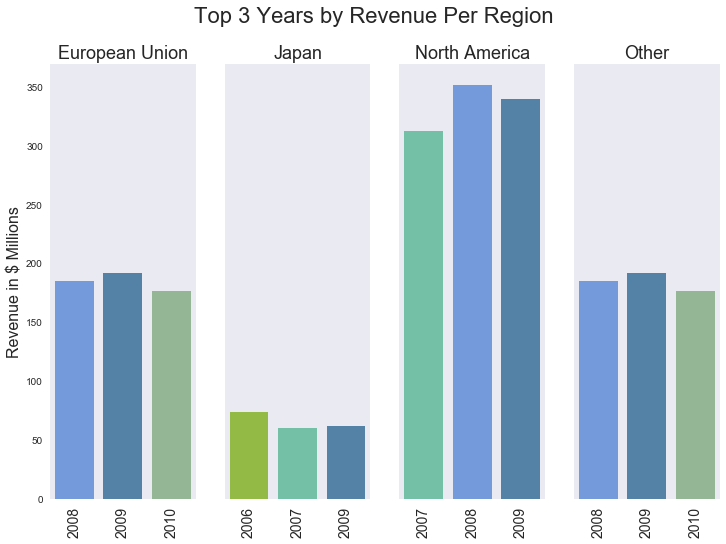

In [669]:
# Top 3 Genres by Revenue Per Region
EU = df.pivot_table('EU_Sales', columns='Year', aggfunc='sum')
EU = EU.sort_values(ascending=False)
EU = EU.iloc[0:3]
JP = df.pivot_table('JP_Sales', columns='Year', aggfunc='sum')
JP = JP.sort_values(ascending=False)
JP = JP.iloc[0:3]
NA = df.pivot_table('NA_Sales', columns='Year', aggfunc='sum')
NA = NA.sort_values(ascending=False)
NA = NA.iloc[0:3]
Other = df.pivot_table('EU_Sales', columns='Year', aggfunc='sum')
Other = Other.sort_values(ascending=False)
Other = Other.iloc[0:3]

colors =  {2006.0:"yellowgreen", 2007.0:"mediumaquamarine", 2008.0:"cornflowerblue", 2009.0:"steelblue", 2010.0:"darkseagreen"}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU.index, rotation=90, size=14)
ax2.set_xticklabels(labels = JP.index, rotation=90, size=14)
x_axis = ax1.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
sns.barplot(x=(EU.index).astype(int), y=EU, palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2, sharey=ax1)
ax2.set_xticklabels(labels = JP.index, rotation=90, size=14)
x_axis = ax2.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
y_axis = ax2.axes.get_yaxis()
y_axis.set_visible(False)
sns.barplot(x=(JP.index).astype(int), y=JP, palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = NA.index, rotation=90, size=14)
x_axis = ax3.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
y_axis = ax3.axes.get_yaxis()
y_axis.set_visible(False)
sns.barplot(x=(NA.index).astype(int), y=NA, palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other.index, rotation=90, size=14)
x_axis = ax4.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
y_axis = ax4.axes.get_yaxis()
y_axis.set_visible(False)
sns.barplot(x=(Other.index).astype(int), y=Other, palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Years by Revenue Per Region', size=22)
plt.show();

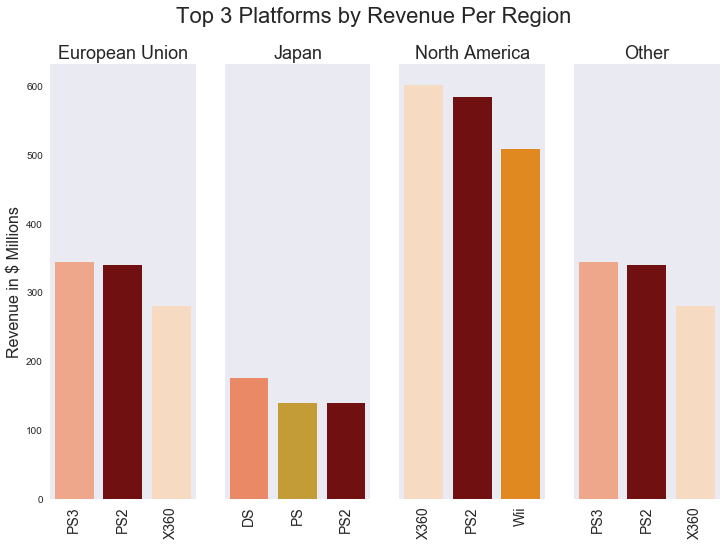

In [670]:
# Top 3 Genres by Revenue Per Region
EU = df.pivot_table('EU_Sales', columns='Platform', aggfunc='sum')
EU = EU.sort_values(ascending=False)
EU = EU.iloc[0:3]
JP = df.pivot_table('JP_Sales', columns='Platform', aggfunc='sum')
JP = JP.sort_values(ascending=False)
JP = JP.iloc[0:3]
NA = df.pivot_table('NA_Sales', columns='Platform', aggfunc='sum')
NA = NA.sort_values(ascending=False)
NA = NA.iloc[0:3]
Other = df.pivot_table('EU_Sales', columns='Platform', aggfunc='sum')
Other = Other.sort_values(ascending=False)
Other = Other.iloc[0:3]

colors =  {'PS':"goldenrod", 'PS2':"maroon", 'PS3':"lightsalmon", 'DS':"coral", 'X360':"peachpuff", 'Wii':"darkorange"}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU.index, rotation=90, size=14)
ax2.set_xticklabels(labels = JP.index, rotation=90, size=14)
x_axis = ax1.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
sns.barplot(x=EU.index, y=EU, palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2, sharey=ax1)
ax2.set_xticklabels(labels = JP.index, rotation=90, size=14)
x_axis = ax2.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
y_axis = ax2.axes.get_yaxis()
y_axis.set_visible(False)
sns.barplot(x=JP.index, y=JP, palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = NA.index, rotation=90, size=14)
x_axis = ax3.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
y_axis = ax3.axes.get_yaxis()
y_axis.set_visible(False)
sns.barplot(x=NA.index, y=NA, palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other.index, rotation=90, size=14)
x_axis = ax4.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
y_axis = ax4.axes.get_yaxis()
y_axis.set_visible(False)
sns.barplot(x=Other.index, y=Other, palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Platforms by Revenue Per Region', size=22)
plt.show();